In [1]:
import numpy as np
import time
from joblib import Parallel, delayed
import multiprocessing

# Crea dos listas grandes
a = list(range(1000000))
b = list(range(1000000, 2000000))

# Tiempo del bucle for
start = time.time()
c = []
for i in range(len(a)):
    c.append(a[i] + b[i])
end = time.time()
print("Tiempo del bucle for:", end - start)

# Tiempo de NumPy
start = time.time()
a = np.array(a)
b = np.array(b)
c = a + b
end = time.time()
print("Tiempo de NumPy:", end - start)

# Tiempo de joblib
start = time.time()
def suma(i):
    return a[i] + b[i]
c = Parallel(n_jobs=2)(delayed(suma)(i) for i in range(len(a)))
end = time.time()
print("Tiempo de joblib:", end - start)

# Tiempo de multiprocessing
start = time.time()
def suma(i):
    return a[i] + b[i]
pool = multiprocessing.Pool(processes=2)
c = pool.map(suma, range(len(a)))
pool.close()
end = time.time()
print("Tiempo de multiprocessing:", end - start)

Tiempo del bucle for: 0.0761101245880127
Tiempo de NumPy: 0.05525493621826172
Tiempo de joblib: 2.629676342010498
Tiempo de multiprocessing: 0.7764229774475098


In [2]:
import numpy as np
import time
from joblib import Parallel, delayed
import multiprocessing
import matplotlib.pyplot as plt

# Función para la suma
def suma(x, y):
  return x + y

In [3]:
# Función para simular los experimentos
def simular(n_simulations):
  results = []
  for _ in range(n_simulations):
    # Crear listas grandes
    a = list(range(1000000))
    b = list(range(1000000, 2000000))

    # Bucle for
    start = time.time()
    c = []
    for i in range(len(a)):
      c.append(a[i] + b[i])
    end = time.time()
    for_time = end - start

    # NumPy
    start = time.time()
    a = np.array(a)
    b = np.array(b)
    c = a + b
    end = time.time()
    numpy_time = end - start

    # joblib
    start = time.time()
    c = Parallel(n_jobs=2)(delayed(suma)(a[i], b[i]) for i in range(len(a)))
    end = time.time()
    joblib_time = end - start

    # multiprocessing
    start = time.time()
    pool = multiprocessing.Pool(processes=2)
    c = pool.starmap(suma, zip(a, b))
    pool.close()
    end = time.time()
    multiprocessing_time = end - start

    # Guardar resultados
    results.append({
        "for": for_time,
        "numpy": numpy_time,
        "joblib": joblib_time,
        "multiprocessing": multiprocessing_time
    })
  return results

Estadísticas del bucle for:
  Media: 0.051150035858154294
  Desviación estándar: 0.0045712988495004115
Estadísticas de NumPy:
  Media: 0.0558875560760498
  Desviación estándar: 0.002686637850618954
Estadísticas de joblib:
  Media: 5.196506428718567
  Desviación estándar: 0.19484316283640227
Estadísticas de multiprocessing:
  Media: 3.072630000114441
  Desviación estándar: 0.12123674181544766


/tmp/ipykernel_1384/3007265288.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([for_times, numpy_times, joblib_times, multiprocessing_times],


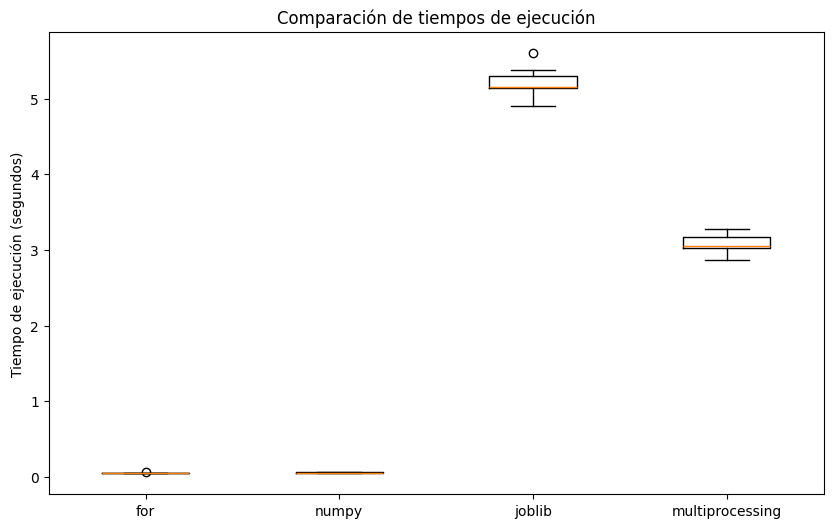

In [4]:
# Función para analizar resultados
def analizar_resultados(results):
  for_times = [r['for'] for r in results]
  numpy_times = [r['numpy'] for r in results]
  joblib_times = [r['joblib'] for r in results]
  multiprocessing_times = [r['multiprocessing'] for r in results]

  # Estadísticas básicas
  print("Estadísticas del bucle for:")
  print(f"  Media: {np.mean(for_times)}")
  print(f"  Desviación estándar: {np.std(for_times)}")

  print("Estadísticas de NumPy:")
  print(f"  Media: {np.mean(numpy_times)}")
  print(f"  Desviación estándar: {np.std(numpy_times)}")

  print("Estadísticas de joblib:")
  print(f"  Media: {np.mean(joblib_times)}")
  print(f"  Desviación estándar: {np.std(joblib_times)}")

  print("Estadísticas de multiprocessing:")
  print(f"  Media: {np.mean(multiprocessing_times)}")
  print(f"  Desviación estándar: {np.std(multiprocessing_times)}")

  # Gráfico
  plt.figure(figsize=(10, 6))
  plt.boxplot([for_times, numpy_times, joblib_times, multiprocessing_times],
              labels=['for', 'numpy', 'joblib', 'multiprocessing'])
  plt.ylabel("Tiempo de ejecución (segundos)")
  plt.title("Comparación de tiempos de ejecución")
  plt.show()

# Ejecutar simulaciones
resultados = simular(10)

# Analizar resultados
analizar_resultados(resultados)